In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import numpy as np
import pandas as pd

import splusdata

### Setting plot parameters

In [3]:
fontsize = 35
labelsize = 35


rc("xtick", labelsize=fontsize)
rc("ytick", labelsize=fontsize)
rcParams["axes.linewidth"] = 5.3
rcParams["xtick.major.width"] = 5.3
rcParams["xtick.minor.width"] = 5.3
rcParams["ytick.major.width"] = 5.3
rcParams["ytick.minor.width"] = 5.3
rcParams["xtick.major.size"] = 12.5
rcParams["xtick.minor.size"] = 6.5
rcParams["ytick.major.size"] = 12.5
rcParams["ytick.minor.size"] = 6.5

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 50,
        }


cmap = plt.get_cmap('gnuplot2')
color_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
colors = [cmap(value) for value in color_values]

### Loading data

In [4]:
photoz_table = pd.read_csv("tables_photometric/Hydra_iDR4_morecolumns.csv", usecols=['ID_1', 'RA_1', 'DEC_1', 'zml', 'odds', 
                                                                       'PROB_GAL', 'r_petro', 'g_petro'])

In [5]:
ra_pz = photoz_table["RA_1"]
dec_pz = photoz_table["DEC_1"]
zml = photoz_table["zml"]
odds = photoz_table["odds"]
prob_gal = photoz_table["PROB_GAL"]
r_petro = photoz_table["r_petro"]
g_petro = photoz_table["g_petro"]
objid = photoz_table["ID_1"]

In [6]:
#Defining the center of Hydra (in degress)
ra_0 = 159.17
dec_0 = -27.524

#Defining the radius of 1R200 around the center (in degrees)
#R200 = 1.4Mpc + scale of 0.247 Kpc/" ==> radius = 1.5744º
radius = 1.5744

def dist(ra, dec):
    return np.sqrt((ra - ra_0)**2 + (dec - dec_0)**2)

#Defining a mask for the objects inside 1R200
distances = dist(ra_pz, dec_pz)

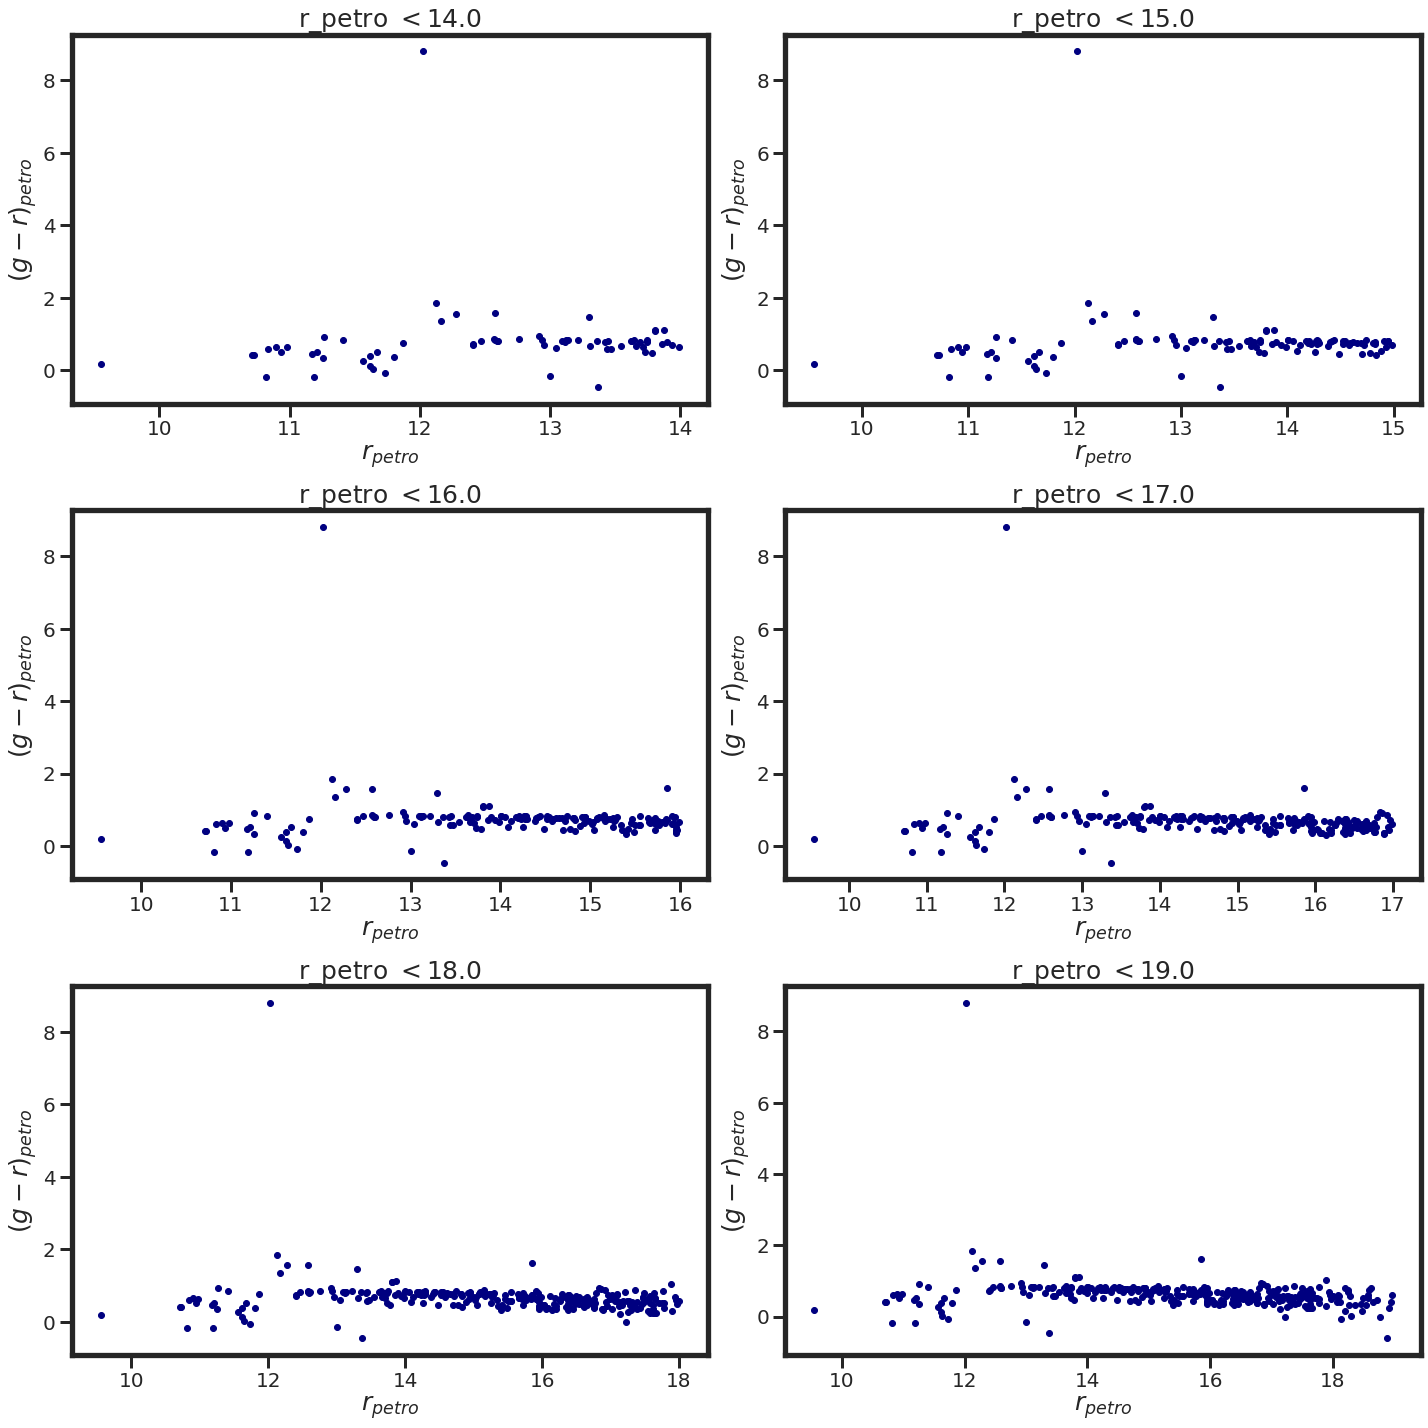

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

#Aqui faço um loop pra ir mudando a magnitude limite a cada plot
for ax, mlim in zip(axs.ravel(), [14, 15, 16, 17, 18, 19]):
    
    mask = (distances < radius) & (odds > 0.8) & (prob_gal > 0.8) & (zml > 0.0) & (zml < 0.03) & (r_petro < mlim)
    
    ax.scatter(r_petro[mask], g_petro[mask] - r_petro[mask], marker='o', color='navy')
    
    ax.set_title("r_petro $< {:.1f}$".format(mlim), fontsize=25, fontname='fantasy')
    ax.set_xlabel(r"$r_{petro}$", fontsize=25)
    ax.set_ylabel(r"$(g-r)_{petro}$", fontsize=25)
    
    ax.yaxis.set_tick_params(labelsize=20, width=3)
    ax.xaxis.set_tick_params(labelsize=20, width=3)
    
    
fig.tight_layout()
plt.savefig("../Figures/color-magnitude-diagrams3.pdf", format='pdf')

## Color-magnitude diagram up to r_petro = 19

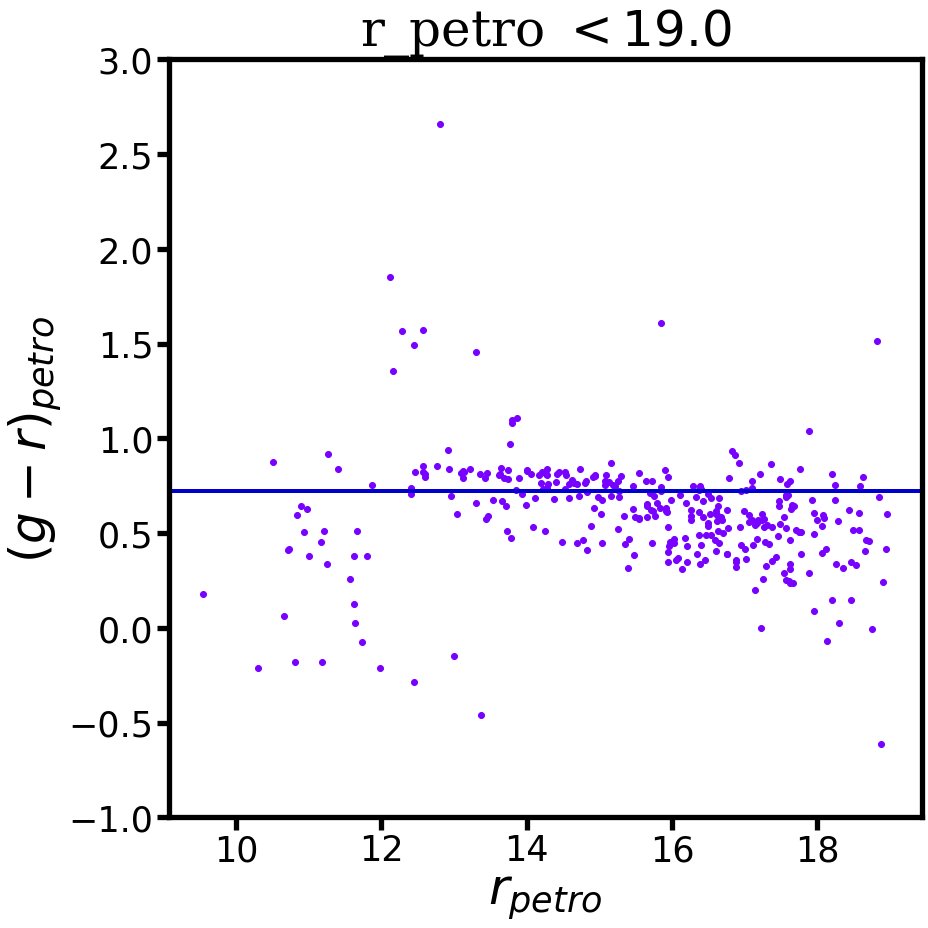

In [8]:
#Division of colours
division = 0.72

mlim = 19
fontsize=30
labelsize=25

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111)
  
mask = (distances < radius) & (odds > 0.7) & (prob_gal > 0.8) & (zml > 0.0) & (zml < 0.03) & (r_petro < mlim)

ax.scatter(r_petro[mask], g_petro[mask] - r_petro[mask], marker='o', color=colors[3])

ax.set_title("r_petro $< {:.1f}$".format(mlim), fontdict=font)
ax.set_xlabel(r"$r_{petro}$", fontdict=font)
ax.set_ylabel(r"$(g-r)_{petro}$", fontdict=font)
ax.axhline(division, color=colors[1], linewidth=4.0)

ax.set_ylim(-1, 3)

# ax.yaxis.set_tick_params(labelsize=labelsize, width=3)
# ax.xaxis.set_tick_params(labelsize=labelsize, width=3)

# ax.grid()
    
fig.tight_layout()
plt.savefig("../Figures/Dissertation/color-magnitude-diagram.png", format='png')

### Checking the outlier

In [19]:
id_outlier = objid[mask][(g_petro[mask] - r_petro[mask]) > 6]
ra_outlier = ra_pz[mask][(g_petro[mask] - r_petro[mask]) > 6]
dec_outlier = dec_pz[mask][(g_petro[mask] - r_petro[mask]) > 6]

In [21]:
ra_outlier, dec_outlier

(284980    159.307258
 Name: RA_1, dtype: float64,
 284980   -27.534446
 Name: DEC_1, dtype: float64)

In [18]:
conn = splusdata.connect('elosch', '@Hydra-Kentaurus1987')

You have access to internal data


In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

img = conn.twelve_band_img(ra_outlier, dec_outlier, radius=500, noise=0.15, saturation=0.15)
ax.imshow(img)
ax.axis('off')

tx = ax.text(2, 35, str(index), color='white', verticalalignment='center', fontsize=25)

#### Didn't work. I had a look for this object in Simbad and it seems there is object at that coordinates